###                                                                                         Name: Sharon Laurance Muthipeedika 
###                                                                                         Matriculation No: 312486

## Part B: Linear Regression with Real-World Data (5 Points)

### Parkisons Dataset: target − > total_UPDRS

In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

#### 1. A set of training data Dtrain = ${(x^1, y^1),(x^2, y^2), ...,(x^N, y^N)}$, where $x ∈ R^M, y ∈R$, where N is number of training examples and M is number of features

#### Linear Regression model is given as $\hat{y^n} =  \sum \limits _{m=1} ^{M} {\beta}_{m}x^n_{m} $

#### Least square loss function is given as $l(x,y) =  \sum \limits _{n=1} ^{N} (y^n - \hat{y^n})^2 $


#### Minimize the loss function l(x, y) using Gradient Descent algorithm. Implement (learn-linregGD and minimize-GD algorithms given in the lecture slides). Choose imax between 100 to 1000. Explain your choice [hint: the following plots might be useful in your choice.]


#### You can choose three suitable values of step length α > 0. For each value of step length perform the learning and record
 - In each iteration of the minimize-GD algorithm calculate |f(xi−1) − f(xi)| and (when imax is reached), plot it against iteration number i. Explain the graph.
 - In each iteration step also calculate RMSE on test set RMSE and plot it against iteration number i. Explain the graph.


In [2]:
df=pd.read_csv("C:\\Users\\Sharon\\ML_LAB\\Lab 3\\datasets\\parkinsons_updrs.data",delimiter=',')

In [3]:
df1=df[["subject#","age","motor_UPDRS","Shimmer:APQ11","motor_UPDRS","RPDE","PPE","total_UPDRS"]]

In [4]:
df1.corr()

,subject#,age,motor_UPDRS,Shimmer:APQ11,motor_UPDRS,RPDE,PPE,total_UPDRS
subject#,1.000000,-0.030864,0.252919,0.173333,0.252919,0.147300,0.157559,0.253643
age,-0.030864,1.000000,0.273665,0.135238,0.273665,0.090208,0.120790,0.310290
motor_UPDRS,0.252919,0.273665,1.000000,0.136560,1.000000,0.128607,0.162433,0.947231
Shimmer:APQ11,0.173333,0.135238,0.136560,1.000000,0.136560,0.480739,0.623416,0.120838
motor_UPDRS,0.252919,0.273665,1.000000,0.136560,1.000000,0.128607,0.162433,0.947231
RPDE,0.147300,0.090208,0.128607,0.480739,0.128607,1.000000,0.566065,0.156897
PPE,0.157559,0.120790,0.162433,0.623416,0.162433,0.566065,1.000000,0.156195
total_UPDRS,0.253643,0.310290,0.947231,0.120838,0.947231,0.156897,0.156195,1.000000


In [5]:
df_train=df1.sample(frac=0.8,random_state=200) #random state is a seed value
df_test=df1.drop(df_train.index)

In [6]:
X=df_train.iloc[:,0:7]
y=df_train.iloc[:,7:]
X_test=df_test.iloc[:,0:7]
y_test=df_test.iloc[:,7:]
X_test

,subject#,age,motor_UPDRS,Shimmer:APQ11,motor_UPDRS,RPDE,PPE
2,1,72,28.695,0.01458,28.695,0.46222,0.21014
17,1,72,33.643,0.02293,33.643,0.50991,0.23048
18,1,72,34.109,0.02145,34.109,0.52714,0.18211
37,1,72,31.776,0.01927,31.776,0.50686,0.14519
48,1,72,36.977,0.02232,36.977,0.49219,0.18939
...,...,...,...,...,...,...,...
5842,42,61,23.979,0.01661,23.979,0.46831,0.17418
5845,42,61,22.485,0.01931,22.485,0.51492,0.11344
5850,42,61,19.725,0.01465,19.725,0.58904,0.16296
5856,42,61,22.437,0.01450,22.437,0.61557,0.14092


In [7]:
m=len(y)
m1=len(y_test)
X = np.hstack((np.ones([m,1]), X)) # Append the bias term (field containing all ones) to X.
y = np.array(y).reshape(-1,1) 

X_test=np.hstack((np.ones([m1,1]), X_test))
y_test = np.array(y_test).reshape(-1,1)

In [8]:
def minimise_gd(X,y,alpha,beta,imax,epsilon,m):   
    J_history=[]
    abs_value=[]
    rmse_value=[]
    for i in range(imax):
        temp=np.dot(X,beta)-y
        temp=np.dot(X.T,temp)
        beta_old=beta
        print(beta_old)
        beta=beta_old-(alpha*(1/len(y)))*temp
        abs_value.append(abs(least_square_function(X, y, beta_old)-least_square_function(X, y, beta)))
        J_history.append(least_square_function(X, y, beta))
        rmse_value.append(find_rmse(beta))
    return beta,J_history,abs_value,rmse_value
        
def least_square_function(X,y,beta):
    f = (1/2*len(y)) * np.sum(np.square((X.dot(beta))-y))  
    return f

def find_rmse(beta):
    Y_predicted=np.dot(X_test,beta)
    mse=np.square(np.subtract(y_test,Y_predicted)).mean() 
    rmse=sqrt(mse)
    return rmse

### Step length α = 0.00001

In [13]:
#Case 1 with alpha=0.00001
alpha=0.00001
imax=100
epsilon=0.006
beta=np.zeros([8,1])
beta_old=np.zeros([8,1])
print(np.shape(X))
a,b,c,d=minimise_gd(X,y,alpha,beta,imax,epsilon,m)
print("Final beta value is",a)
print("Function values are",b)
print("Absolute values are",c)
print("RMSE at each step is",d)

(4700, 8)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[2.89494873e-04]
 [6.53604284e-03]
 [1.90337197e-02]
 [6.97465823e-03]
 [8.20563891e-06]
 [6.97465823e-03]
 [1.58611393e-04]
 [6.50590182e-05]]
[[5.62301197e-04]
 [1.27009097e-02]
 [3.69699486e-02]
 [1.35798979e-02]
 [1.59426991e-05]
 [1.35798979e-02]
 [3.08135834e-04]
 [1.26409023e-04]]
[[8.19366093e-04]
 [1.85156528e-02]
 [5.38709756e-02]
 [1.98366535e-02]
 [2.32377662e-05]
 [1.98366535e-02]
 [4.49088992e-04]
 [1.84260465e-04]]
[[1.06158295e-03]
 [2.40001300e-02]
 [6.97955549e-02]
 [2.57646714e-02]
 [3.01159174e-05]
 [2.57646714e-02]
 [5.81957277e-04]
 [2.38811855e-04]]
[[1.28979445e-03]
 [2.91730726e-02]
 [8.47991076e-02]
 [3.13825781e-02]
 [3.66008070e-05]
 [3.13825781e-02]
 [7.07199501e-04]
 [2.90250439e-04]]
[[1.50479549e-03]
 [3.40521489e-02]
 [9.89339100e-02]
 [3.67079429e-02]
 [4.27147474e-05]
 [3.67079429e-02]
 [8.25248444e-04]
 [3.38752841e-04]]
[[1.70733584e-03]
 [3.86540250e-02]
 [1.12249272e-01]
 [4.17573385e-02]

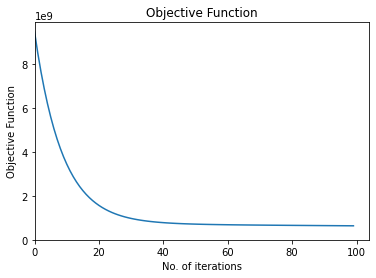

In [14]:
plt.title('Objective Function')
plt.xlabel('No. of iterations')
plt.ylabel('Objective Function')
plt.plot(np.reshape(b,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

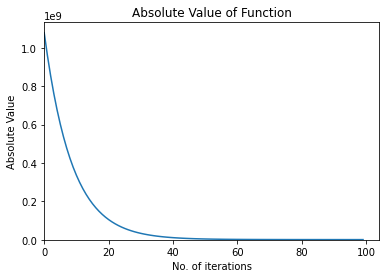

In [15]:
plt.title('Absolute Value of Function')
plt.xlabel('No. of iterations')
plt.ylabel('Absolute Value')
plt.plot(np.reshape(c,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

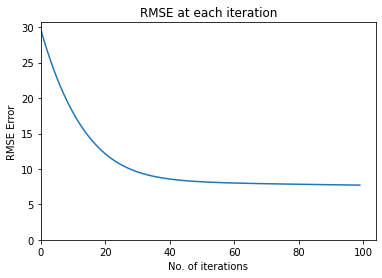

In [16]:
plt.title('RMSE at each iteration')
plt.xlabel('No. of iterations')
plt.ylabel('RMSE Error')
plt.plot(d)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

### Step length α = 0.000003

In [21]:
#Case 2 with alpha=0.000003
alpha=0.000003
imax=100
epsilon=0.006
beta=np.zeros([8,1])
beta_old=np.zeros([8,1])
print(np.shape(X))
beta_value_2,least_square_function_2,abs_value_function_2,rmse_value_function_2=minimise_gd(X,y,alpha,beta,imax,epsilon,m)
print("Final beta value is",beta_value_2)
print("Function values are",least_square_function_2)
print("Absolute values are",abs_value_function_2)
print("RMSE at each step is",rmse_value_function_2)

(4700, 8)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[8.68484620e-05]
 [1.96081285e-03]
 [5.71011590e-03]
 [2.09239747e-03]
 [2.46169167e-06]
 [2.09239747e-03]
 [4.75834179e-05]
 [1.95177054e-05]]
[[1.72194954e-04]
 [3.88821986e-03]
 [1.13214576e-02]
 [4.15154727e-03]
 [4.88121126e-06]
 [4.15154727e-03]
 [9.43490101e-05]
 [3.87015997e-05]]
[[2.56065050e-04]
 [5.78278945e-03]
 [1.68357070e-02]
 [6.17801464e-03]
 [7.25927658e-06]
 [6.17801464e-03]
 [1.40310700e-04]
 [5.75573649e-05]]
[[3.38483885e-04]
 [7.64508034e-03]
 [2.22545172e-02]
 [8.17235517e-03]
 [9.59659321e-06]
 [8.17235517e-03]
 [1.85482173e-04]
 [7.60905866e-05]]
[[4.19476169e-04]
 [9.47564176e-03]
 [2.75795132e-02]
 [1.01351150e-02]
 [1.18938548e-05]
 [1.01351150e-02]
 [2.29876883e-04]
 [9.43067550e-05]]
[[4.99066191e-04]
 [1.12750136e-02]
 [3.28122923e-02]
 [1.20668310e-02]
 [1.41517430e-05]
 [1.20668310e-02]
 [2.73508053e-04]
 [1.12211267e-04]]
[[5.77277825e-04]
 [1.30437265e-02]
 [3.79544249e-02]
 [1.39680309e-02]

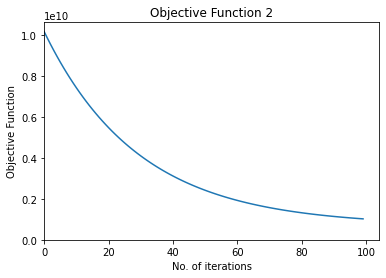

In [22]:
plt.title('Objective Function 2')
plt.xlabel('No. of iterations')
plt.ylabel('Objective Function')
plt.plot(np.reshape(least_square_function_2,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

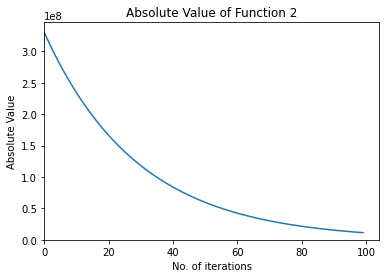

In [23]:
plt.title('Absolute Value of Function 2')
plt.xlabel('No. of iterations')
plt.ylabel('Absolute Value')
plt.plot(np.reshape(abs_value_function_2,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

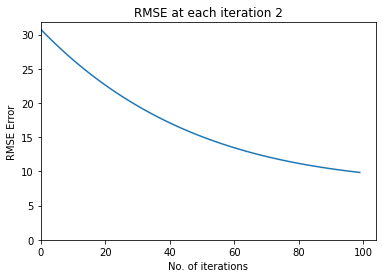

In [24]:
plt.title('RMSE at each iteration 2')
plt.xlabel('No. of iterations')
plt.ylabel('RMSE Error')
plt.plot(rmse_value_function_2)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

### Step length α = 0.0000023

In [25]:
#Case 3 with alpha=0.0000023
alpha=0.0000023
imax=100
epsilon=0.006
beta=np.zeros([8,1])
beta_old=np.zeros([8,1])
print(np.shape(X))
beta_value_3,least_square_function_3,abs_value_function_3,rmse_value_function_3=minimise_gd(X,y,alpha,beta,imax,epsilon,m)
print("Final beta value is",beta_value_3)
print("Function values are",least_square_function_3)
print("Absolute values are",abs_value_function_3)
print("RMSE at each step is",rmse_value_function_3)

(4700, 8)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[6.65838208e-05]
 [1.50328985e-03]
 [4.37775552e-03]
 [1.60417139e-03]
 [1.88729695e-06]
 [1.60417139e-03]
 [3.64806204e-05]
 [1.49635742e-05]]
[[1.32284817e-04]
 [2.98694450e-03]
 [8.69745379e-03]
 [3.18880055e-03]
 [3.74980608e-06]
 [3.18880055e-03]
 [7.24805410e-05]
 [2.97309415e-05]]
[[1.97114513e-04]
 [4.45122007e-03]
 [1.29598527e-02]
 [4.75414217e-03]
 [5.58785087e-06]
 [4.75414217e-03]
 [1.08006036e-04]
 [4.43046627e-05]]
[[2.61084282e-04]
 [5.89636938e-03]
 [1.71657001e-02]
 [6.30044764e-03]
 [7.40175056e-06]
 [6.30044764e-03]
 [1.43063298e-04]
 [5.86872647e-05]]
[[3.24205348e-04]
 [7.32264192e-03]
 [2.13157344e-02]
 [7.82796508e-03]
 [9.19182022e-06]
 [7.82796508e-03]
 [1.77658438e-04]
 [7.28812417e-05]]
[[3.86488790e-04]
 [8.73028394e-03]
 [2.54106840e-02]
 [9.33693933e-03]
 [1.09583708e-05]
 [9.33693933e-03]
 [2.11797487e-04]
 [8.68890555e-05]]
[[4.47945541e-04]
 [1.01195385e-02]
 [2.94512681e-02]
 [1.08276121e-02]

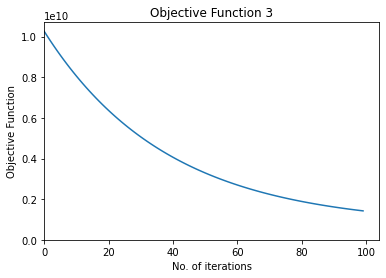

In [26]:
plt.title('Objective Function 3')
plt.xlabel('No. of iterations')
plt.ylabel('Objective Function')
plt.plot(np.reshape(least_square_function_3,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

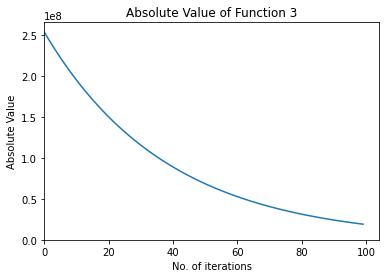

In [27]:
plt.title('Absolute Value of Function 3')
plt.xlabel('No. of iterations')
plt.ylabel('Absolute Value')
plt.plot(np.reshape(abs_value_function_3,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

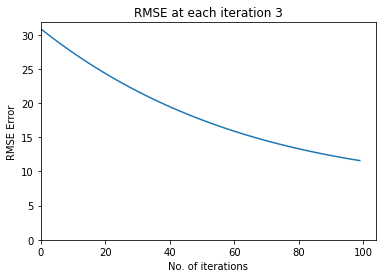

In [28]:
plt.title('RMSE at each iteration 3')
plt.xlabel('No. of iterations')
plt.ylabel('RMSE Error')
plt.plot(rmse_value_function_3)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

##### In the above graph, we see that initially, the error reduces significantly. But as iterations increase, there is not much reduction seen in the error.

### Exercise 3: Steplength Control for Gradient Descent

#### 1. Steplength-Backtracking as given in lecture slides

In [29]:
df1=df[["subject#","age","motor_UPDRS","Shimmer:APQ11","motor_UPDRS","RPDE","PPE","total_UPDRS"]]

In [30]:
df_train=df1.sample(frac=0.8,random_state=200) #random state is a seed value
df_test=df1.drop(df_train.index)

In [31]:
X=df_train.iloc[:,0:7]
y=df_train.iloc[:,7:]
X_test=df_test.iloc[:,0:7]
y_test=df_test.iloc[:,7:]
y_test

,total_UPDRS
2,35.389
17,43.524
18,44.146
37,41.034
48,47.970
...,...
5842,34.979
5845,33.485
5850,28.634
5856,32.249


In [32]:
m=len(y)
m1=len(y_test)
X = np.hstack((np.ones([m,1]), X)) # Append the bias term (field containing all ones) to X.
y = np.array(y).reshape(-1,1) 

X_test=np.hstack((np.ones([m1,1]), X_test))
y_test = np.array(y_test).reshape(-1,1)

In [33]:
def minimise_gd(X,y,beta,imax,epsilon):   
    J_history=[]
    abs_value=[]
    rmse_value=[]
    for i in range(imax):
        temp=np.dot(X,beta)-y
        temp=np.dot(X.T,temp)
        beta_old=beta
        print(beta_old)
        mu=stepsize_backtracking(X,0.1,0.5,beta,temp)
        beta=beta_old-(mu*(1/len(y)))*temp
        abs_value.append(abs(least_square_function(X, y, beta_old)-least_square_function(X, y, beta)))
        J_history.append(least_square_function(X, y, beta))
        rmse_value.append(find_rmse(beta))
    return beta,J_history,abs_value,rmse_value
        
def least_square_function(X,y,beta):
    f = (1/2*len(y)) * np.sum(np.square((X.dot(beta))-y))  
    return f

def find_rmse(beta):
    Y_predicted=np.dot(X_test,beta)
    mse=np.square(np.subtract(y_test,Y_predicted)).mean() 
    rmse=sqrt(mse)
    return rmse

def stepsize_backtracking(X,steepness,reduction_factor,beta,temp):
    mu=1
    while ((least_square_function(X,y,(beta-(1/len(y))*mu*temp))>least_square_function(X, y, beta)-steepness*mu*np.dot(temp.T,temp)).item(0)):
        mu=reduction_factor*mu 
    return mu

In [34]:
#Here learning rate is not defined
#alpha=0.000001
imax=100
epsilon=0.006
beta=np.zeros([8,1])
beta_old=np.zeros([8,1])
print(np.shape(X))
a,b,c,d=minimise_gd(X,y,beta,imax,epsilon)
print("Final beta value is",a)
print("Function values are",b)
print("Absolute values are",c)
print("RMSE at each step is",d)

(4700, 8)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[7.06774593e-03]
 [1.59571358e-01]
 [4.64690421e-01]
 [1.70279742e-01]
 [2.00332981e-04]
 [1.70279742e-01]
 [3.87234846e-03]
 [1.58835494e-03]]
[[4.18834129e-03]
 [9.79045701e-02]
 [2.75225421e-01]
 [1.20368887e-01]
 [1.21371288e-04]
 [1.20368887e-01]
 [2.32845168e-03]
 [9.65965689e-04]]
[[5.14421940e-03]
 [1.21350872e-01]
 [3.38023753e-01]
 [1.54902240e-01]
 [1.49986311e-04]
 [1.54902240e-01]
 [2.87226848e-03]
 [1.19529142e-03]]
[[4.62636045e-03]
 [1.11911868e-01]
 [3.03929344e-01]
 [1.56545134e-01]
 [1.37158057e-04]
 [1.56545134e-01]
 [2.61327813e-03]
 [1.09668679e-03]]
[[4.73299082e-03]
 [1.18180392e-01]
 [3.10925161e-01]
 [1.84461096e-01]
 [1.43420056e-04]
 [1.84461096e-01]
 [2.71644218e-03]
 [1.15239924e-03]]
[[4.35309024e-03]
 [1.11452216e-01]
 [2.85986231e-01]
 [1.88240610e-01]
 [1.34248774e-04]
 [1.88240610e-01]
 [2.53136674e-03]
 [1.08311488e-03]]
[[4.39393054e-03]
 [1.18800902e-01]
 [2.88954209e-01]
 [2.36701380e-01]

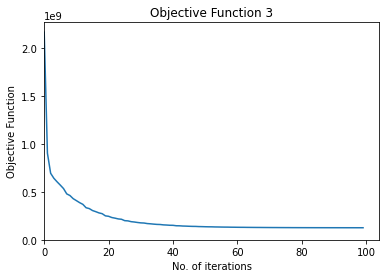

In [35]:
plt.title('Objective Function 3')
plt.xlabel('No. of iterations')
plt.ylabel('Objective Function')
plt.plot(np.reshape(b,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

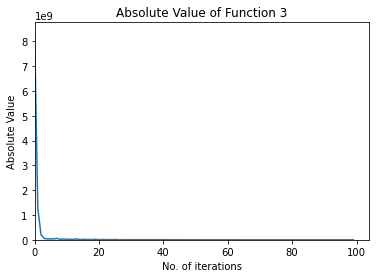

In [36]:
plt.title('Absolute Value of Function 3')
plt.xlabel('No. of iterations')
plt.ylabel('Absolute Value')
plt.plot(np.reshape(c,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

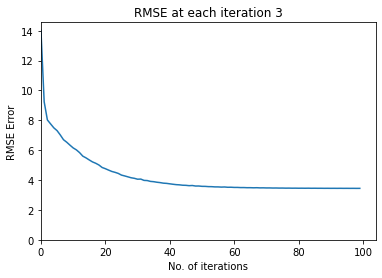

In [37]:
plt.title('RMSE at each iteration 3')
plt.xlabel('No. of iterations')
plt.ylabel('RMSE Error')
plt.plot(d)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

#### 2. Steplength-Bolddriver as given in lecture slides

In [38]:
df1=df[["subject#","age","motor_UPDRS","Shimmer:APQ11","motor_UPDRS","RPDE","PPE","total_UPDRS"]]

In [39]:
df_train=df1.sample(frac=0.8,random_state=200) #random state is a seed value
df_test=df1.drop(df_train.index)

In [40]:
X=df_train.iloc[:,0:7]
y=df_train.iloc[:,7:]
X_test=df_test.iloc[:,0:7]
y_test=df_test.iloc[:,7:]
y_test

,total_UPDRS
2,35.389
17,43.524
18,44.146
37,41.034
48,47.970
...,...
5842,34.979
5845,33.485
5850,28.634
5856,32.249


In [41]:
m=len(y)
m1=len(y_test)
X = np.hstack((np.ones([m,1]), X)) # Append the bias term (field containing all ones) to X.
y = np.array(y).reshape(-1,1) 

X_test=np.hstack((np.ones([m1,1]), X_test))
y_test = np.array(y_test).reshape(-1,1)

In [53]:
def minimise_gd(X,y,beta,imax,epsilon):   
    J_history=[]
    abs_value=[]
    rmse_value=[]
    for i in range(imax):
        temp=np.dot(X,beta)-y
        temp=np.dot(X.T,temp)
        beta_old=beta
        print(beta_old)
        mu=steplength_bolddriver(X,temp,0.001,0.1,0.5) #If its 0.01 then cost function increases with iterations and for 0.001 it decreases with iterations
        beta=beta_old-(mu*(1/len(y)))*temp
        abs_value.append(abs(least_square_function(X, y, beta_old)-least_square_function(X, y, beta)))
        J_history.append(least_square_function(X, y, beta))
        rmse_value.append(find_rmse(beta))
    return beta,J_history,abs_value,rmse_value
        
def least_square_function(X,y,beta):
    f = (1/2*len(y)) * np.sum(np.square((X.dot(beta))-y))  
    return f

def find_rmse(beta):
    Y_predicted=np.dot(X_test,beta)
    mse=np.square(np.subtract(y_test,Y_predicted)).mean() 
    rmse=sqrt(mse)
    return rmse

def steplength_bolddriver(X,temp,mu_old,stepsize_increase,stepsize_decrease):
    mu=mu_old*stepsize_increase
#     while ((least_square_function(X, y, beta)-least_square_function(X, y, beta-2*mu*temp)).item(0)<=0): #This increases computation time a lot
#         mu=mu*stepsize_decrease 
    if((least_square_function(X, y, beta)>least_square_function(X, y, beta-(1/len(y))*mu*temp)).item(0)):
        return mu*stepsize_increase 
    else:
        return mu*stepsize_decrease
#     return mu

In [54]:
#Here learning rate is not defined
#alpha=0.000001
imax=100
epsilon=0.006
beta=np.zeros([8,1])
beta_old=np.zeros([8,1])
print(np.shape(X))
a,bold,c,d=minimise_gd(X,y,beta,imax,epsilon)
print("Final beta value is",a)
print("Function values are",bold)
print("Absolute values are",c)
print("RMSE at each step is",d)

(4700, 8)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[2.89494873e-04]
 [6.53604284e-03]
 [1.90337197e-02]
 [6.97465823e-03]
 [8.20563891e-06]
 [6.97465823e-03]
 [1.58611393e-04]
 [6.50590182e-05]]
[[5.62301197e-04]
 [1.27009097e-02]
 [3.69699486e-02]
 [1.35798979e-02]
 [1.59426991e-05]
 [1.35798979e-02]
 [3.08135834e-04]
 [1.26409023e-04]]
[[8.19366093e-04]
 [1.85156528e-02]
 [5.38709756e-02]
 [1.98366535e-02]
 [2.32377662e-05]
 [1.98366535e-02]
 [4.49088992e-04]
 [1.84260465e-04]]
[[1.06158295e-03]
 [2.40001300e-02]
 [6.97955549e-02]
 [2.57646714e-02]
 [3.01159174e-05]
 [2.57646714e-02]
 [5.81957277e-04]
 [2.38811855e-04]]
[[1.28979445e-03]
 [2.91730726e-02]
 [8.47991076e-02]
 [3.13825781e-02]
 [3.66008070e-05]
 [3.13825781e-02]
 [7.07199501e-04]
 [2.90250439e-04]]
[[1.50479549e-03]
 [3.40521489e-02]
 [9.89339100e-02]
 [3.67079429e-02]
 [4.27147474e-05]
 [3.67079429e-02]
 [8.25248444e-04]
 [3.38752841e-04]]
[[1.70733584e-03]
 [3.86540250e-02]
 [1.12249272e-01]
 [4.17573385e-02]

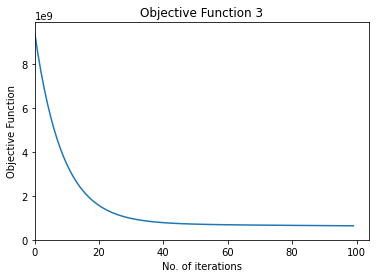

In [55]:
plt.title('Objective Function 3')
plt.xlabel('No. of iterations')
plt.ylabel('Objective Function')
plt.plot(np.reshape(bold,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

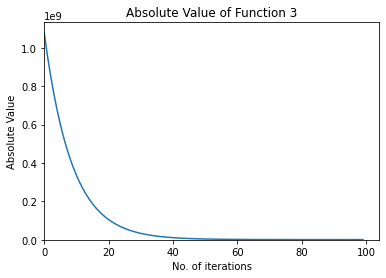

In [56]:
plt.title('Absolute Value of Function 3')
plt.xlabel('No. of iterations')
plt.ylabel('Absolute Value')
plt.plot(np.reshape(c,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

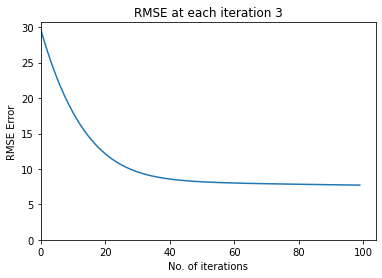

In [57]:
plt.title('RMSE at each iteration 3')
plt.xlabel('No. of iterations')
plt.ylabel('RMSE Error')
plt.plot(d)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

#### LookAhead Optimiser
Lookahead maintains a set of slow weights φ and fast weights θ, which get synced with the fast weights every k updates.
The fast weights are updated through applying A, any standard optimization algorithm, to batches of training examples sampled from the dataset D. After k inner optimizer updates using A, the slow weights are updated towards the fast weights by linearly interpolating in weight space, θ − φ. We denote the slow weights learning rate as α. After each slow weights update, the fast weights are reset to the current slow weights value

Reference Paper on :Lookahead Optimizer: k steps forward, 1 step back

In [58]:
df1=df[["subject#","age","motor_UPDRS","Shimmer:APQ11","motor_UPDRS","RPDE","PPE","total_UPDRS"]]

In [59]:
df_train=df1.sample(frac=0.8,random_state=200) #random state is a seed value
df_test=df1.drop(df_train.index)

In [60]:
X=df_train.iloc[:,0:7]
y=df_train.iloc[:,7:]
X_test=df_test.iloc[:,0:7]
y_test=df_test.iloc[:,7:]
y_test

,total_UPDRS
2,35.389
17,43.524
18,44.146
37,41.034
48,47.970
...,...
5842,34.979
5845,33.485
5850,28.634
5856,32.249


In [61]:
m=len(y)
m1=len(y_test)
X = np.hstack((np.ones([m,1]), X)) # Append the bias term (field containing all ones) to X.
y = np.array(y).reshape(-1,1) 

X_test=np.hstack((np.ones([m1,1]), X_test))
y_test = np.array(y_test).reshape(-1,1)

In [77]:
def lookahead_optimiser(X,y,beta,beta_old,slow_weight,k,slow_weight_stepsize,tmax):
    J_history=[]
    abs_value=[]
    rmse_value=[]
    for t in range (tmax):
        beta=slow_weight
        for i in range(k):
            X_d,y_d=create_minibatch(X,y)
            beta_old=beta
            beta=beta_old+minimise_gd(X_d,y_d,0.0000001,beta_old,100)
        slow_weight_old=slow_weight
        slow_weight=slow_weight_old+slow_weight_stepsize*(np.subtract(beta,slow_weight_old))
        J_history.append(least_square_function(X, y, slow_weight))
        abs_value.append(abs(least_square_function(X, y, slow_weight_old)-least_square_function(X, y, slow_weight)))
        rmse_value.append(find_rmse(slow_weight))
    return slow_weight,J_history,abs_value,rmse_value
    
def create_minibatch(X,y):
    x_s = pd.DataFrame(data=X,  columns=["1","2","3","4","5","6","7","8"])
    y_s = pd.DataFrame(data=y,  columns=["1"])
    frames=[x_s,y_s]
    final=pd.concat(frames,axis=1,ignore_index=True)
    final=final.sample(frac=0.1,random_state=200)
    X=final.iloc[:,1:8]
    y=final.iloc[:,8:]
    m=len(y)
    X_final = np.hstack((np.ones([m,1]), X)) # Append the bias term (field containing all ones) to X.
    y_final = np.array(y).reshape(-1,1) 
    return X_final,y_final
    
    
    
def minimise_gd(X,y,alpha,beta,imax):   
    J_history=[]
    abs_value=[]
    rmse_value=[]
    for i in range(imax):
        temp=np.dot(X,beta)-y
        temp=np.dot(X.T,temp)
        beta_old=beta
#         print(beta_old)
        beta=beta_old-(alpha*(1/len(y)))*temp
        abs_value.append(abs(least_square_function(X, y, beta_old)-least_square_function(X, y, beta)))
        J_history.append(least_square_function(X, y, beta))
        rmse_value.append(find_rmse(beta))
    return beta
#,J_history,abs_value,rmse_value
        
def least_square_function(X,y,beta):
    f = (1/2*len(y)) * np.sum(np.square((X.dot(beta))-y))  
    return f

def find_rmse(beta):
    Y_predicted=np.dot(X_test,beta)
    mse=np.square(np.subtract(y_test,Y_predicted)).mean() 
    rmse=sqrt(mse)
    return rmse

In [78]:
alpha=0.000001
imax=100
epsilon=0.006
tmax=100
beta=np.zeros([8,1])
beta_old=np.zeros([8,1])
slow_weight=np.zeros([8,1])
print(np.shape(X))
a,b,c,d=lookahead_optimiser(X,y,beta,beta_old,slow_weight,10,0.00001,tmax)
# a,b,c,d=minimise_gd(X,y,alpha,beta,imax,epsilon)
print("Final beta value is",a)
print("Function values are",b)
print("Absolute values are",c)
print("RMSE at each step is",d)

(4700, 8)
Final beta value is [[3.45644787e-04]
 [7.98898910e-03]
 [2.28585025e-02]
 [8.70849218e-03]
 [1.06591327e-05]
 [8.70849218e-03]
 [1.91455670e-04]
 [8.17879297e-05]]
Function values are [10505386900.420494, 10496340822.99722, 10487229389.096474, 10478052161.184845, 10468808699.369787, 10459498561.397013, 10450121302.648083, 10440676476.138273, 10431163632.514627, 10421582320.054266, 10411932084.662941, 10402212469.87382, 10392423016.846542, 10382563264.366543, 10372632748.844595, 10362631004.316687, 10352557562.444138, 10342411952.514006, 10332193701.439795, 10321902333.762455, 10311537371.651691, 10301098334.90758, 10290584740.962502, 10279996104.883413, 10269331939.374434, 10258591754.779797, 10247775059.08713, 10236881357.931091, 10225910154.597391, 10214860950.02716, 10203733242.821722, 10192526529.24772, 10181240303.242687, 10169874056.420984, 10158427278.08017, 10146899455.20778, 10135290072.488565, 10123598612.31214, 10111824554.781101, 10099967377.719603, 10088026556.6

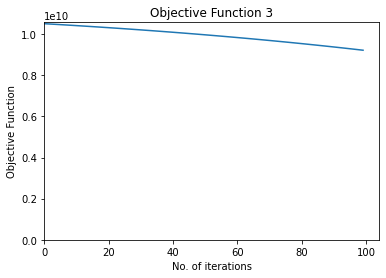

In [79]:
plt.title('Objective Function 3')
plt.xlabel('No. of iterations')
plt.ylabel('Objective Function')
plt.plot(np.reshape(b,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

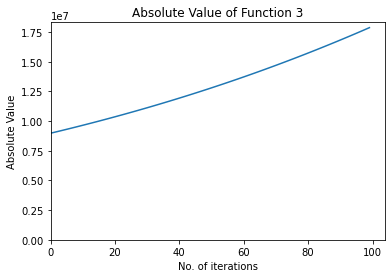

In [80]:
plt.title('Absolute Value of Function 3')
plt.xlabel('No. of iterations')
plt.ylabel('Absolute Value')
plt.plot(np.reshape(c,[100,1]))
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

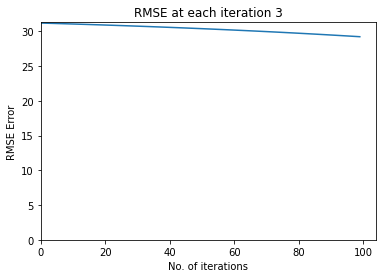

In [81]:
plt.title('RMSE at each iteration 3')
plt.xlabel('No. of iterations')
plt.ylabel('RMSE Error')
plt.plot(d)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

#### Declare a winning step-length controller based on the metric RMSE. You should tune the associatedhyperparameters of the step-length controller(s).

##### According to the Model, Selected Pararmeters and columns Stepsize backtracking gives the best RMSE Reduction over iterations

#### References:
 - https://medium.com/nothingaholic/multiple-linear-regression-with-python-22e2087cd628
 - https://www.askpython.com/python/examples/rmse-root-mean-square-error
 - https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
 - https://stackoverflow.com/questions/41181779/merging-2-dataframes-vertically